# EDA

## 1. Importar modulos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## 2. Carga de los datos

In [2]:
ruta = 'C:/Users/matia/OneDrive/Escritorio/Mass_Prediction'

In [3]:
datos = 'trabajo_resultado_preprocesamiento.pickle'

In [4]:
ruta_completa = ruta + '/02_Datos/03_Trabajo/' + datos
df = pd.read_pickle(ruta_completa)

## 3. Analisis Estadistico

Revisar cuales son las caracteristicas estadisticas de los datos, para identificar patrones y/o singularidades.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Run,69991.0,1.479353e+05,9.210717e+02,146511.000000,1.471140e+05,1.479290e+05,1.490110e+05,1.491820e+05
Event,69991.0,4.969786e+08,4.040087e+08,6414.000000,2.029082e+08,3.916100e+08,6.364471e+08,1.791247e+09
E1,69991.0,3.633068e+01,4.101257e+01,0.377928,8.438780e+00,2.171900e+01,4.975755e+01,8.506020e+02
px1,69991.0,1.606155e-01,1.333010e+01,-152.969000,-5.182775e+00,1.475080e-01,5.739235e+00,1.184020e+02
py1,69991.0,1.362097e-01,1.351414e+01,-126.079000,-5.286410e+00,7.854810e-02,5.556085e+00,1.474670e+02
pz1,69991.0,-1.467055e+00,5.137555e+01,-840.987000,-1.576170e+01,-2.901580e-01,1.330150e+01,7.600960e+02
pt1,69991.0,1.439610e+01,1.237406e+01,0.219629,3.756735e+00,1.296460e+01,2.002745e+01,1.677720e+02
eta1,69991.0,-6.203789e-02,1.461908e+00,-4.165380,-1.282250e+00,-5.661510e-02,1.147345e+00,2.622970e+00
phi1,69991.0,1.964343e-02,1.800220e+00,-3.141580,-1.528255e+00,2.709930e-02,1.560215e+00,3.141420e+00
Q1,69991.0,-9.101170e-03,9.999657e-01,-1.000000,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00


Al comparar las propiedades de los electrones, se pueden notar que:

1.- El segundo electrón tiene, en promedio, más energía

2.- Las magnitudes de las compomentes espaciales py y pz de momentum los electrones no tiene diferencias significativas, mientras que la componente px del electrón 2 en promedio es menor la del electrón 1.

3.- El promedio de la pseoduo-rapidity de ambos electrones no tiene una diferencia significativa, pero al ver la distribución es mayor en magnitud el electrón 2 parece tiene picos más elevados

4.- Los angulos de momento se ven similares a nivel de promedio y distribución

## 3. Analisis Grafico

Graficando todas las variables del dataset, podemos tener una mejor noción de la forma de los datos y contrastar las conclusiones generadas en el analisis estadistico.

### 3.1 Histogramas

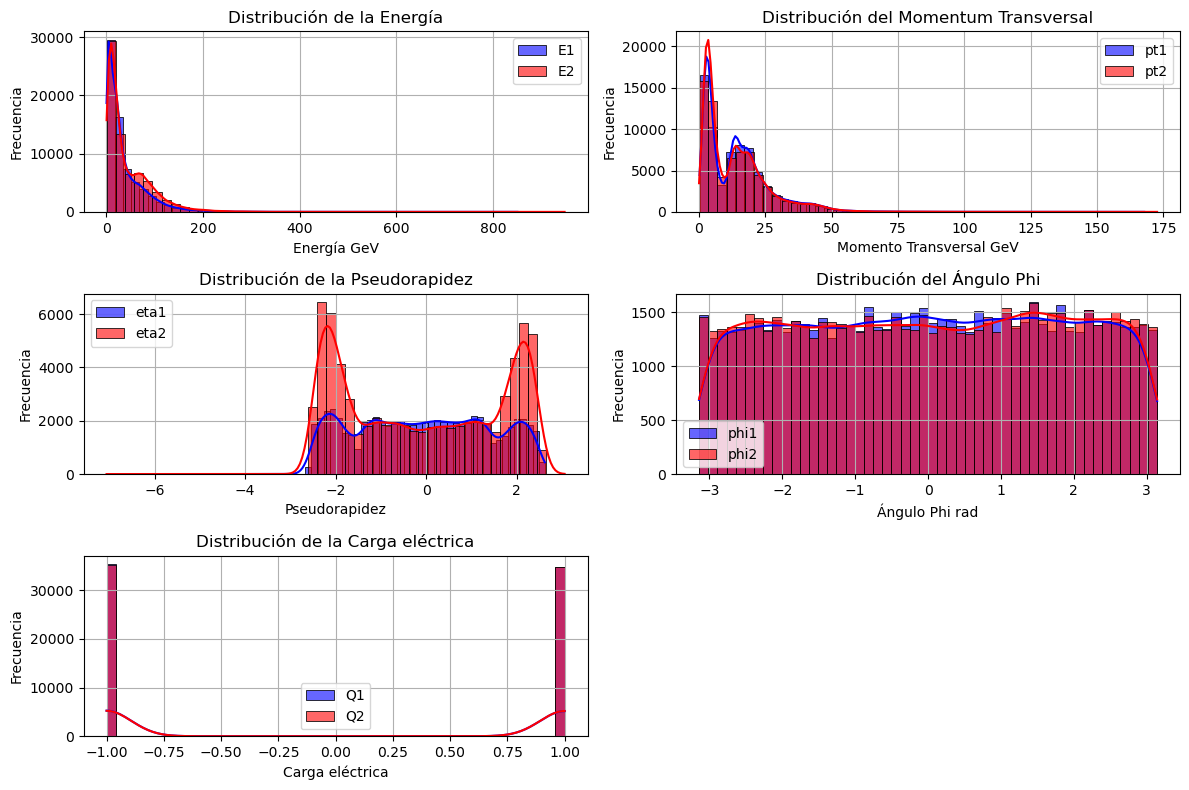

In [6]:
pares = [('E1', 'E2'), ('pt1', 'pt2'), ('eta1', 'eta2'), ('phi1', 'phi2'), ('Q1', 'Q2')]

titulos_ejes = {
    'E1': ("Distribución de la Energía", "Energía GeV"),
    'pt1': ("Distribución del Momentum Transversal", "Momento Transversal GeV"),
    'eta1': ("Distribución de la Pseudorapidez", "Pseudorapidez"),
    'phi1': ("Distribución del Ángulo Phi", "Ángulo Phi rad"),
    'Q1': ("Distribución de la Carga eléctrica", "Carga eléctrica"),
}

plt.figure(figsize=(12, 8))

for i, (var_x, var_y) in enumerate(pares, 1):
    plt.subplot(3, 2, i)  #martriz para los graficos
    title, xlabel = titulos_ejes[var_x] #para los titulos y nombre del eje x
    sns.histplot(df[var_x], bins = 50, color = 'blue', label = var_x, kde = True, alpha=0.6)
    sns.histplot(df[var_y], bins = 50, color = 'red', label = var_y, kde = True, alpha=0.6)
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')
    plt.title(title)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Al revisar los graficos el analisis se expande:

- Se confirma que el E2 es en promedio mayor a E1

- Los picos de eta 2 son visibles

Ademas, el grafico del momentum transversal pt muestra que, en promedio pt2 mayor a pt1. 

Ahora toca revisar los graficos de las compomentes espaciales del momentum.

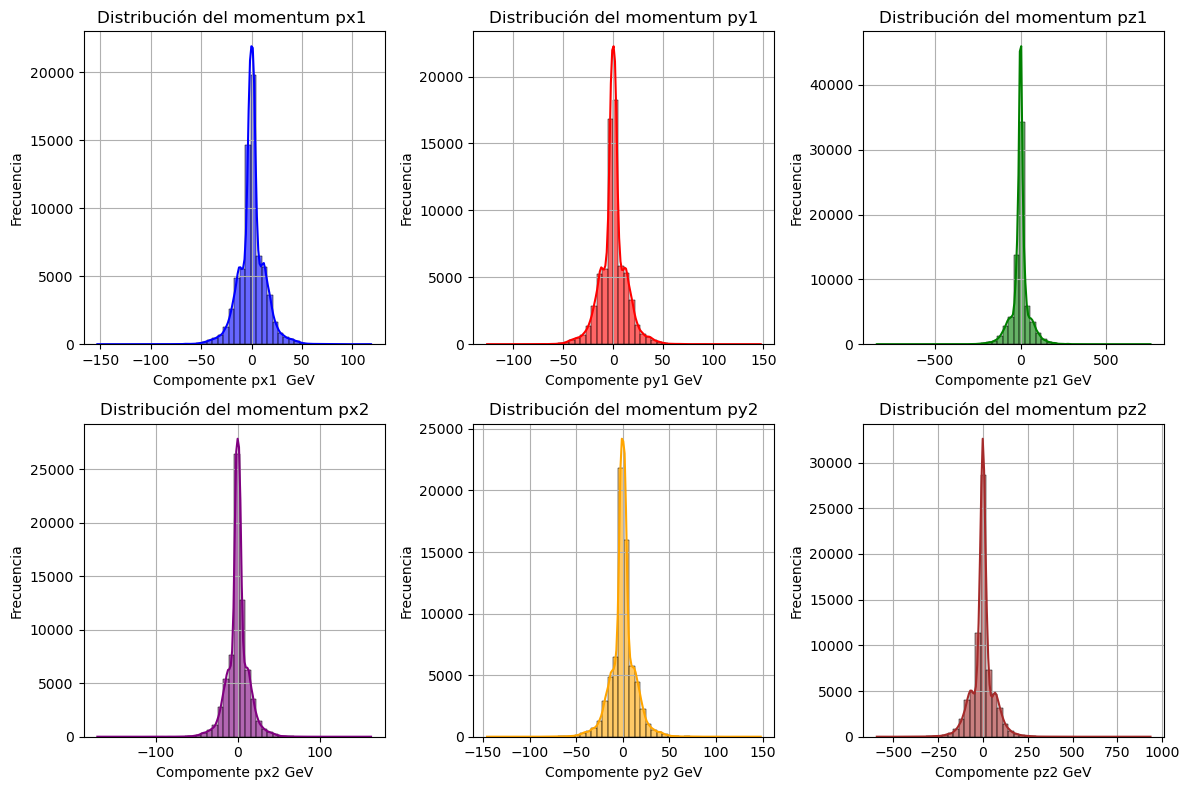

In [7]:
momentum_componentes = ['px1 ', 'py1', 'pz1', 'px2', 'py2', 'pz2']
colores = ['blue', 'red', 'green', 'purple', 'orange', 'brown']

plt.figure(figsize = (12, 8))

for i, var in enumerate(momentum_componentes, 1):
    plt.subplot(2, 3, i) #crear matriz para los graficos
    sns.histplot(df[var], bins = 50, color = colores[i - 1], kde = True, alpha = 0.6)
    plt.xlabel(f'Compomente {var} GeV')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución del momentum {var}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Aqui las conclusiones previas se ven confrontadas:

- El px2 efectivamente tiene un promedio mas elevado que px1

- py1 y py2 no tiene diferencias significativas

- pz1 parece tener un promedio o maximos elevados con respecto a pz2

A continuación, toca revisar la variable target M. 

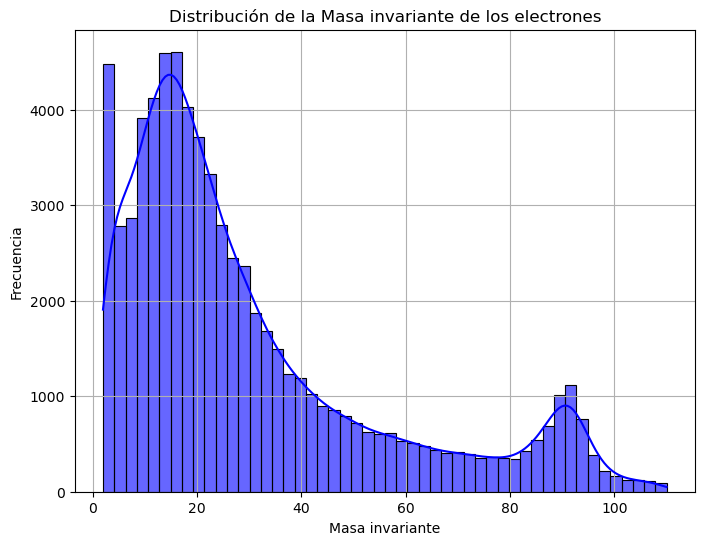

In [8]:
plt.figure(figsize = (8, 6))
sns.histplot(df['M'], bins = 50, color = 'blue', kde = True, alpha = 0.6)
plt.xlabel('Masa invariante')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Masa invariante de los electrones')
plt.grid(True)
plt.show()

Esta variable tiene una distribución binomial, lo que significa que si se plantea predicir con metodos de ML no supervisados es posible identificar al menos 2 cluster.

### 3.2 Graficos de dispersión

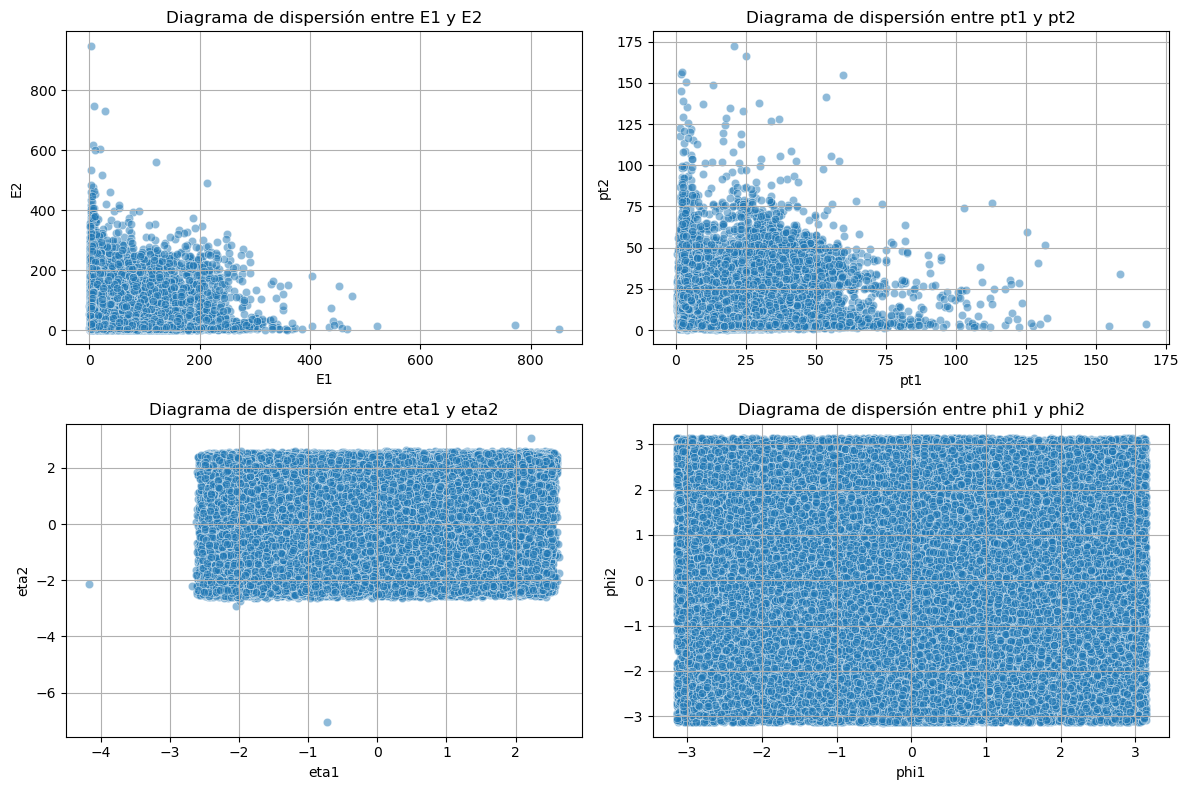

In [9]:
scatter_pairs = [('E1', 'E2'), ('pt1', 'pt2'), ('eta1', 'eta2'), ('phi1', 'phi2')]

plt.figure(figsize=(12, 8))

for i, (var_x, var_y) in enumerate(scatter_pairs, 1):
    plt.subplot(2, 2, i)  #martriz para los graficos
    sns.scatterplot(x=df[var_x], y=df[var_y], alpha=0.5)
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.title(f'Diagrama de dispersión entre {var_x} y {var_y}')
    plt.grid(True)

plt.tight_layout()
plt.show()

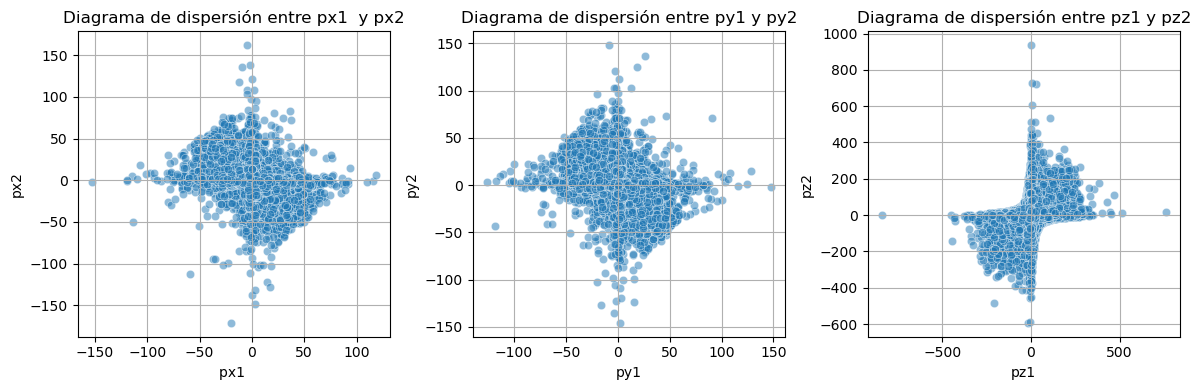

In [10]:
scatter_pairs = [('px1 ', 'px2'), ('py1', 'py2'), ('pz1', 'pz2')]

plt.figure(figsize=(12, 4))

for i, (var_x, var_y) in enumerate(scatter_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[var_x], y=df[var_y], alpha=0.5)
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.title(f'Diagrama de dispersión entre {var_x} y {var_y}')
    plt.grid(True)

plt.tight_layout()
plt.show()

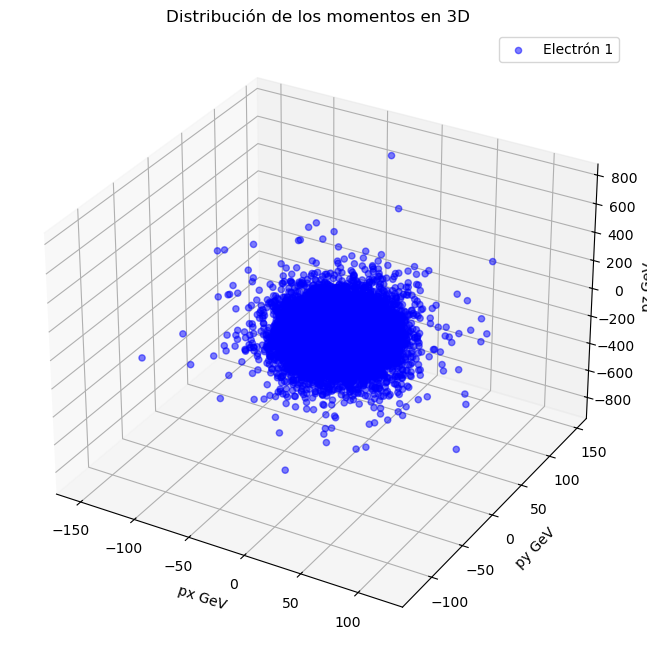

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['px1 '], df['py1'], df['pz1'], alpha=0.5, label='Electrón 1', color='blue')

ax.set_xlabel('px GeV')
ax.set_ylabel('py GeV')
ax.set_zlabel('pz GeV')
ax.set_title('Distribución de los momentos en 3D')
ax.legend()
plt.show()

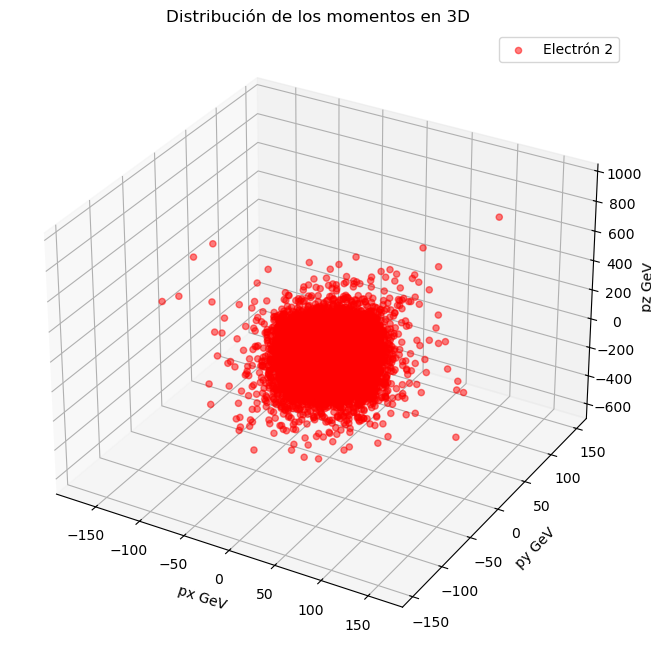

In [21]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['px2'], df['py2'], df['pz2'], alpha=0.5, label='Electrón 2', color='red')

ax.set_xlabel('px GeV')
ax.set_ylabel('py GeV')
ax.set_zlabel('pz GeV')
ax.set_title('Distribución de los momentos en 3D')
ax.legend()
plt.show()

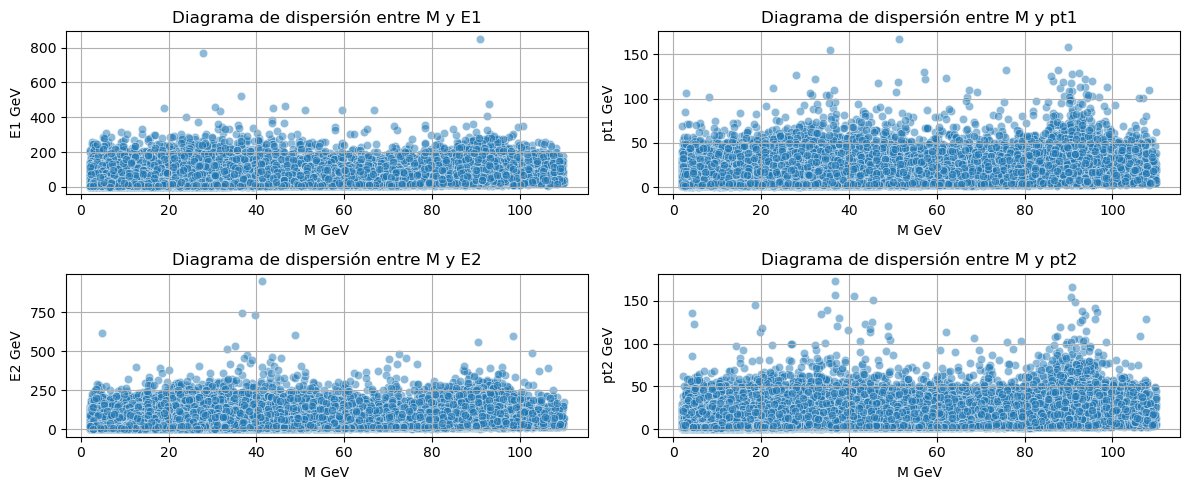

In [18]:
pares = [('M', 'E1'), ('M', 'pt1'), ('M', 'E2'), ('M', 'pt2')]

plt.figure(figsize=(12, 5))

for i, (var_x, var_y) in enumerate(pares, 1):
    plt.subplot(2, 2, i)  #matriz para los graficos
    sns.scatterplot(x=df[var_x], y=df[var_y], alpha=0.5)
    
    plt.xlabel(f'{var_x} GeV')
    plt.ylabel(f'{var_y} GeV')
    plt.title(f'Diagrama de dispersión entre {var_x} y {var_y}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Todos los graficos de dispersion no muestran alguna relación o tendencia clara entre las variables. Aunque si se pueden apreciar algunos outliers dentro de ellas. 

### 3.3 Correlación

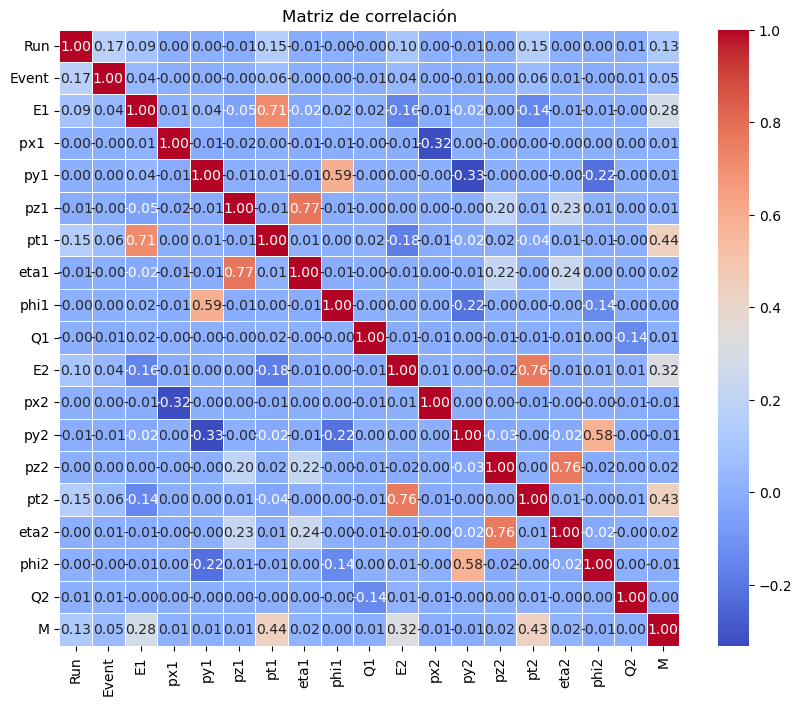

In [16]:
corr_matriz = df.corr()

plt.figure(figsize = (10,8))

sns.heatmap(corr_matriz, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.5)
plt.title('Matriz de correlación')
plt.show()

Se pueden notar relaciones bastante interesantes:

- La energia de los electrones esta fuertemente relacionada con su momentum transversal. Tiene sentido considerado que la ecuacion energia-momentum $$E^2 = (pc)^2 + (mc^2)^2$$ donde el p seria el momentum total definido como $$p^2 = pt^2 + p_{L}^2$$ con $pt$ siendo el momentum transversal y $p_{L}$ el momentum lineal.

- Con esa misma ecuación se puede entender la relacion fuerte que tiene la energía con la masa del electrón.

- La misma conclusión es valida la correlacion entre el momemntum transversal y la masa del electrón.

- Por ultimo la relación entre la componente py y el angulo phi viene de la transformación de coordenadas $$py = pt \sin(\phi)$$

### 3.4 Analisis de los angulos Phi

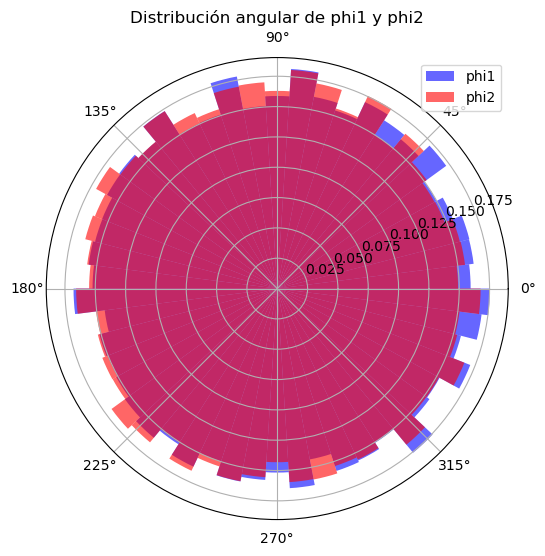

In [20]:
# Convertir a radianes
phi1 = np.radians(df["phi1"]) if df["phi1"].max() > 2 * np.pi else df["phi1"]
phi2 = np.radians(df["phi2"]) if df["phi2"].max() > 2 * np.pi else df["phi2"]

# Crear la figura y el eje polar
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='polar')

ax.hist(phi1, bins=50, alpha=0.6, color="blue", label="phi1", density=True)
ax.hist(phi2, bins=50, alpha=0.6, color="red", label="phi2", density=True)

ax.set_title("Distribución angular de phi1 y phi2")
ax.legend()

plt.show()

Ambas variable cubren el mismo rango de valores, con algunas excepciones.

### Valores atipicos de la variable M

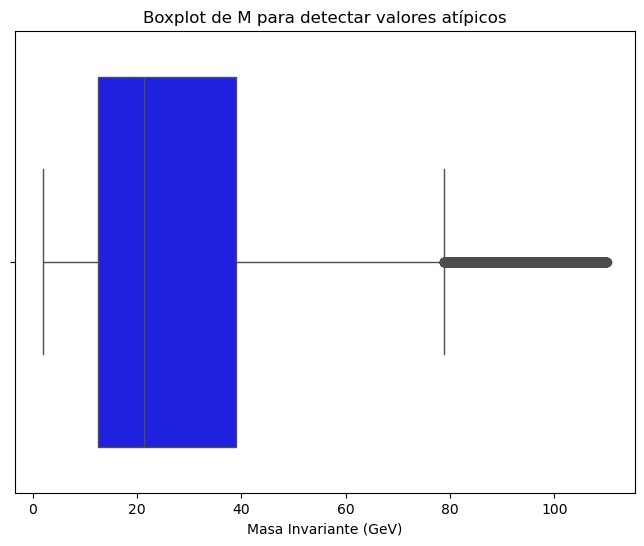

In [26]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df["M"], color="blue")

plt.xlabel("Masa Invariante (GeV)")
plt.title("Boxplot de M para detectar valores atípicos")

plt.show()

Hay varios valores atipicos en la variable target, esto puede generar problemas dependiendo del modelo. Sin embargo, dado que el proposito es probar diferenctes metodos de predicción todos ellos van a enfretar el mismo problema.

### Comparación de las cargas Q1 y Q2

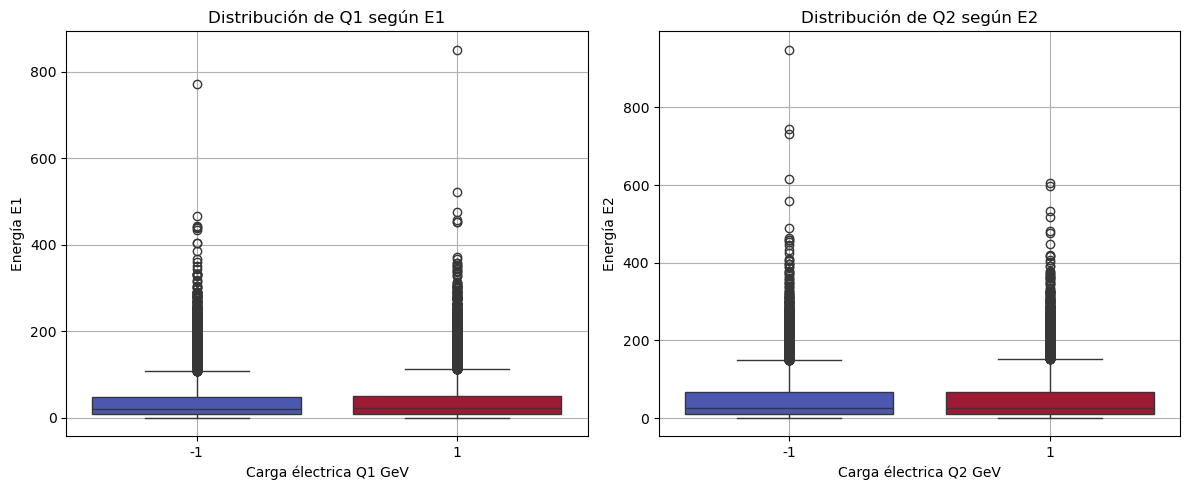

In [30]:
pares = [('Q1', 'E1'), ('Q2', 'E2')]

plt.figure(figsize=(12, 5))

for i, (var_x, var_y) in enumerate(pares, 1):
    
    plt.subplot(1, 2, i)
    sns.boxplot(x = df[var_x], y = df[var_y], hue= df[var_x], palette= 'coolwarm', legend = False)
    plt.xlabel(f'Carga électrica {var_x} GeV')
    plt.ylabel(f'Energía {var_y}')
    plt.title(f'Distribución de {var_x} según {var_y}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Mismo problema que tiene la masa, toca ver como se comportan los modelos ante los valores atipicos.

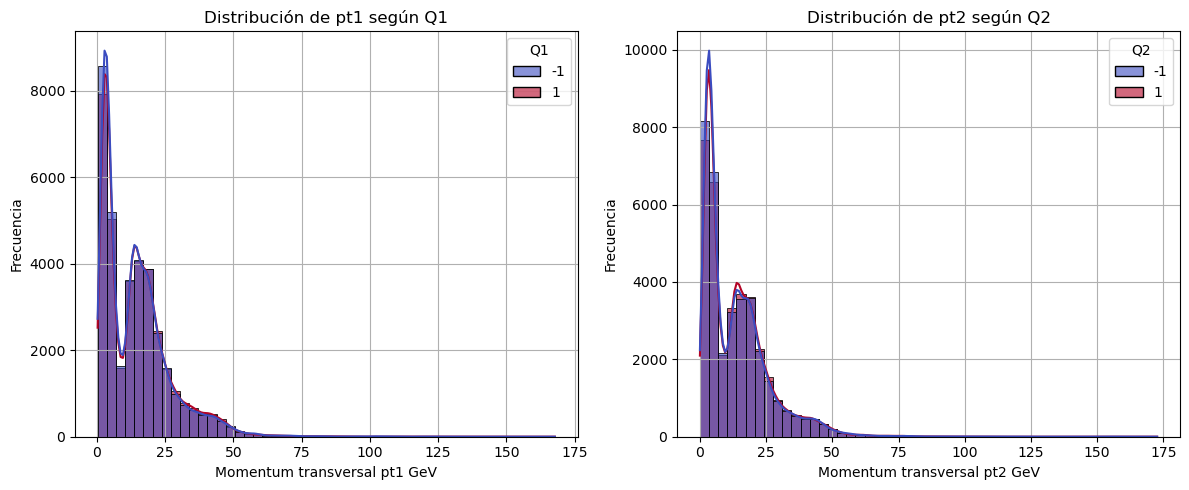

In [32]:
pares = [('pt1', 'Q1'), ('pt2', 'Q2')]

plt.figure(figsize=(12, 5))

for i, (var_x, var_y) in enumerate(pares, 1):
    
    plt.subplot(1, 2, i)
    sns.histplot(data = df, x = var_x, hue= var_y, bins = 50, kde = True, palette= 'coolwarm', alpha = 0.6)
    plt.xlabel(f'Momentum transversal {var_x} GeV')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {var_x} según {var_y}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Los valores de Q1 = 1 tienen a destacar en relacion al valor de su pt1.

Los valores para pt2 con respecto a Q2 paracen mas cercanos entre ellos.

## 4. Guardar los resultados

In [6]:
ruta_trabajo = ruta + '/02_Datos/03_Trabajo/' + 'trabajo_resultado_eda.pickle'

In [7]:
df.to_pickle(ruta_trabajo)